<a href="https://colab.research.google.com/github/PALLITULASIRAM/task-3-linear-regression/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (506, 14)

Missing Values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


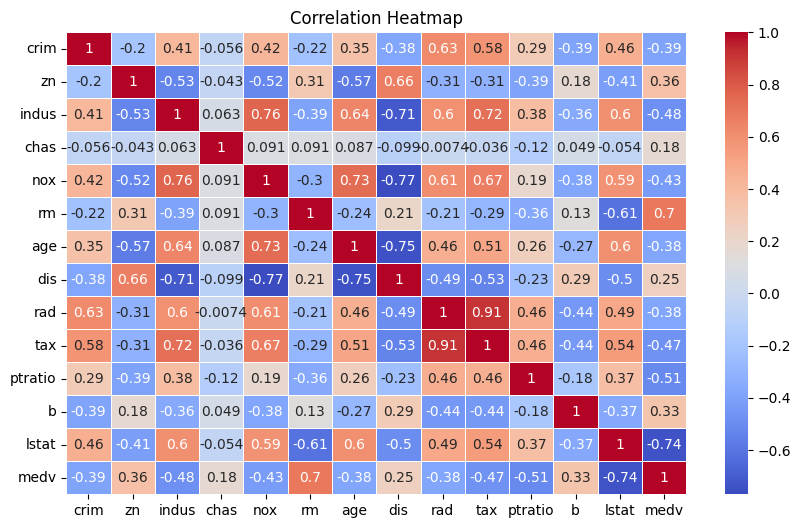


📊 Model Evaluation:
MAE : 3.189091965887837
MSE : 24.291119474973478
RMSE: 4.928602182665332
R² Score: 0.6687594935356326


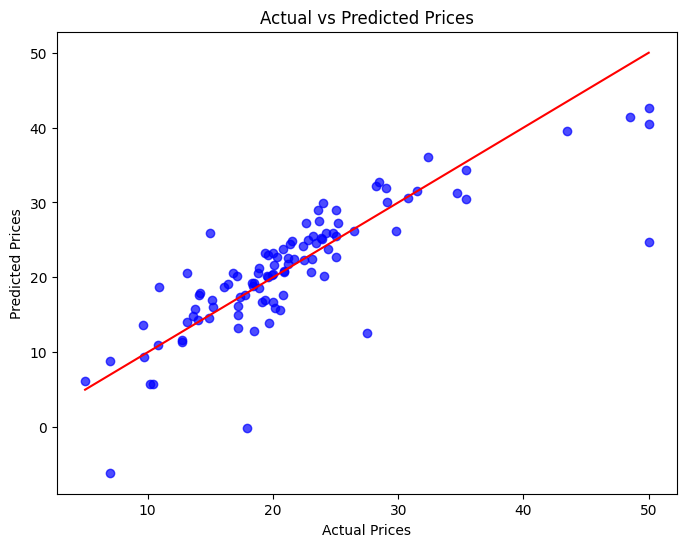


📌 Model Coefficients:
     Feature  Coefficient
0      crim    -0.113056
1        zn     0.030110
2     indus     0.040381
3      chas     2.784438
4       nox   -17.202633
5        rm     4.438835
6       age    -0.006296
7       dis    -1.447865
8       rad     0.262430
9       tax    -0.010647
10  ptratio    -0.915456
11        b     0.012351
12    lstat    -0.508571


In [1]:
# ===============================
# Task 3: Linear Regression in Colab
# ===============================

# Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load Dataset
# If using Kaggle dataset, upload manually in Colab or mount Google Drive
# For testing, you can replace with any CSV dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
df.head()

# Step 3: Data Preprocessing
print("\nMissing Values:\n", df.isnull().sum())

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Define Features & Target
X = df.drop("medv", axis=1)   # Features
y = df["medv"]                # Target (Median value of house)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# Step 9: Plot Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.show()

# Step 10: Coefficients Interpretation
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\n📌 Model Coefficients:\n", coefficients)
